In [3]:
#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install matplotlib
#!pip install matplotlib
#!pip install scikit-learn
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


In [6]:
# dataset
road_df = pd.read_csv("D:\\dataset\\dataset.csv")
road_df.drop(['gender'], inplace = True, axis = 1)
#road_df.rename(columns ={'male':'Sex_male'}, inplace = True)

# removing NaN / NULL values
road_df.dropna(axis = 0, inplace = True)
print(road_df.head(), road_df.shape)
print(road_df.Class.value_counts())


  NationalITy PlaceofBirth     StageID GradeID SectionID Topic Semester  \
0          KW       KuwaIT  lowerlevel    G-04         A    IT        F   
1          KW       KuwaIT  lowerlevel    G-04         A    IT        F   
2          KW       KuwaIT  lowerlevel    G-04         A    IT        F   
3          KW       KuwaIT  lowerlevel    G-04         A    IT        F   
4          KW       KuwaIT  lowerlevel    G-04         A    IT        F   

  Relation  raisedhands  VisITedResources   1  Discussion  \
0   Father           15                16   2          20   
1   Father           20                20   3          25   
2   Father           10                 7   0          30   
3   Father           30                25   5          35   
4   Father           40                50  12          50   

  ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays  Class  
0                   Yes                     Good            Under-7      0  
1                   Yes     

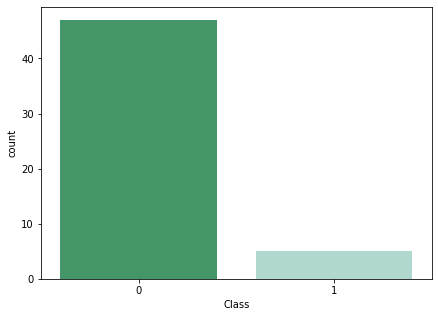

In [7]:

plt.figure(figsize = (7, 5))
sn.countplot(x ='Class', data = road_df,
			palette ="BuGn_r" )
plt.show()


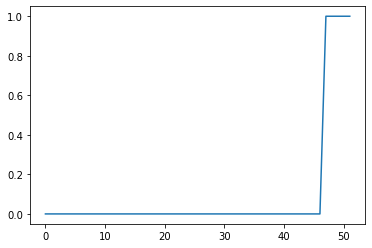

In [8]:
laste = road_df['Class'].plot()
plt.show(laste)


In [12]:
X = np.asarray(road_df[['raisedhands','VisITedResources','Discussion']])
y = np.asarray(road_df['Class'])

# normalization of the datset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (36, 3) (36,)
Test set: (16, 3) (16,)


In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print("Accuracy Of Logistic Regression",score)

Accuracy Of Logistic Regression 0.9375


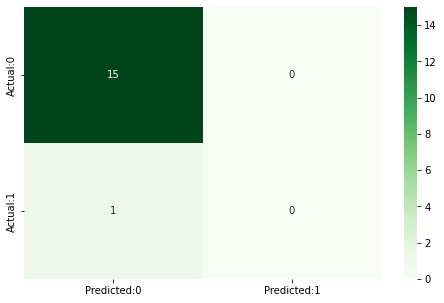

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.00      0.00      0.00         1

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
columns = ['Predicted:0', 'Predicted:1'],
index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is contributed by parna_28 .



In [ ]:
input={'pstatus':[2],'medu':[3],'pedu':[1],'mjob':[3],'fjob':[5],'msalary':[4],'psalary':[3],'traveltime':[2],'studytime':[2],'failures':[1],'internet':[1],'hangout':[0],'alcohol':[0],'tution':[1],'health':[0]}
df2=pd.DataFrame(input,columns=['pstatus','medu','pedu','mjob','fjob','msalary','psalary','traveltime','studytime','failures','internet','hangout','alcohol','tution','health'])
y_pred=logreg.predict(df2)
print(y_pred)


In [ ]:
#Classification Using ANN

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


NameError: name 'X_train' is not defined

In [4]:
#Building the mode for KNN#


knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
score = round(knn.score(X_test, y_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")
print(classification_report(y_test,prediction, target_names = ['healthy', 'sick']))
labels_predicted = knn.predict(X_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(y_test, labels_predicted)
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')


NameError: name 'X_train' is not defined

In [5]:
#Random Forest


from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

NameError: name 'X_train' is not defined